In [3]:
! pip install tabulate

In [79]:
# -*- encoding: utf-8 -*-
'''
@File    :   code_zoe.ipynb
@Time    :   2022/12/05 15:45:02
@Author  :   Zoe Duan 
@Version :   1.0
@Contact :   zoeduan.sci@gmail.com
'''

# here put the import lib
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from tabulate import tabulate

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, LeaveOneOut, LeavePOut, validation_curve, learning_curve, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# set plot parameters
sns.set()
font_titlesize = 18
font_axeslabelsize = 14
font_legendsize = 10

# initialize standard scaler
ss = StandardScaler()

In [112]:
# loading data
df = pd.read_csv('movieReplicationSet.csv')
df.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


In [191]:
# define columns
n_movieRating = 400
movieRating_cols = list(range(0, 400))
sensationSeeking_cols = list(range(400, 421))
personality_cols = list(range(421, 464))
movieExp_cols = list(range(464, 474))
gender_cols = [474]
child_cols = [475]
alone_cols = [476]

# find movie ratings
df_movie = df.iloc[:, movieRating_cols]
df_movie.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,0.5,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,3.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.5,NaN,3.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN


In [76]:
# handle missing data for movie ratings
# replace the NAN with column mean
df_col = df_movie.copy(deep=True)
mean_col = df_col.mean(skipna=True)
df_col = df_col.fillna(mean_col)
# print(df_col.mean(axis=0))

# replace the NAN with row mean
df_row = df_movie.copy(deep=True)
mean_row = df_row.mean(axis=1)
df_row = df_row.T.fillna(mean_row).T
# print(df_row.mean(axis=1))

# combine these two to get the new df
df_new = df_col.add(df_row, fill_value=0)
df_new = df_new.div(2)

df_new.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,2.828460,2.921947,2.650951,4.000000,0.500000,2.510773,2.519156,2.572578,2.428806,2.540410
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,2.820668,2.914154,2.643159,2.673112,4.000000,2.502981,2.511364,2.564786,2.421013,2.532618
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,3.114439,3.207926,2.936930,2.966883,3.500000,2.796752,2.805135,2.858557,2.714784,2.826389
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,2.664348,3.000000,2.486840,2.516793,2.500000,2.346661,2.355044,2.408466,2.264694,2.376299
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,2.500000,2.683993,3.000000,2.442950,2.769704,2.272819,2.281202,1.500000,2.190852,2.302456


# Q1

In [198]:
# define movie indexes
movie_inds = list(range(n_movieRating))

# initialize COD
CODs = np.zeros([n_movieRating, n_movieRating-1])

for i in movie_inds:
    y = np.array(df_new.iloc[:, i])
    
    # remove current movie index
    not_i = [x for x in movie_inds if x != i]
#     print(not_i)
    
    ii = 0
    for j in not_i:
        x = np.array(df_new.iloc[:, j])
        x = x.reshape(-1,1)
        x = ss.fit_transform(x)
        reg = LinearRegression().fit(x, y)
        y_hat = float(reg.coef_)*x + reg.intercept_
        r2 = r2_score(y,y_hat)
        
#         print(r2)
#         rmse = np.sqrt(np.mean(np.sum((y-y_hat)**2)))
        CODs[i, ii] = r2
        ii += 1        

In [224]:
# calculate the mean COD for each movie
CODs_mean = CODs.mean(axis=1)
print(CODs_mean.shape)

(400,)


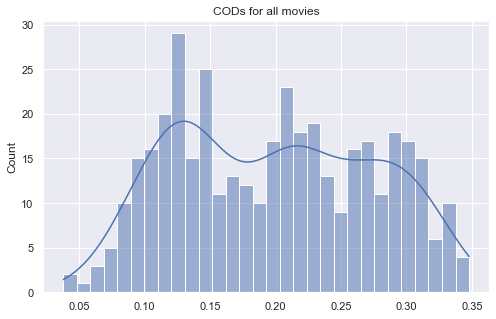

In [137]:
# plot the histogram
plt.figure(figsize=(8,5))
sns.histplot(data=CODs_mean, kde=True, bins=30)
plt.title('CODs for all movies')
plt.show()

In [141]:
# define movie names
movie_names = df_new.keys()

# sort the movie index according to mean CODs
# ascending way
sort_inds = np.argsort(-CODs_mean)

# find top 10 predictable movies
top_10_inds = sort_inds[0:10]
top_10_movies = list(df_new.keys()[top_10_inds])
top_10_CODs = CODs_mean[top_10_inds]
# find the best predicor for top 10 movies
top_10_pred_best = []
for i in range(10):
    pred_names = [x for x in movie_names if x != top_10_movies[i]]
#     print(np.size(pred_names))
    CODs_i = CODs[top_10_inds[i], :]
    sort_pred = np.argsort(CODs_i)
    pred_best = pred_names[sort_pred[-1]]
    top_10_pred_best = np.append(top_10_pred_best, pred_best)

# print results in a tabel
dict_top_10 = {'Movie names' : top_10_movies, 'CODs': top_10_CODs, 'Best predictor': top_10_pred_best}
df_top_10 = pd.DataFrame(dict_top_10)
df_top_10.head(10)

,Movie names,CODs,Best predictor
0,Escape from LA (1996),0.347826,Sexy Beast (2000)
1,Sexy Beast (2000),0.346430,The Silencers (1966)
2,The Lookout (2007),0.343974,Patton (1970)
3,Erik the Viking (1989),0.339293,I.Q. (1994)
4,Crimson Tide (1995),0.334808,The Straight Story (1999)
5,The Bandit (1996),0.332791,Best Laid Plans (1999)
6,Patton (1970),0.332099,The Lookout (2007)
7,The Straight Story (1999),0.331487,Congo (1995)
8,Miller's Crossing (1990),0.331284,The Lookout (2007)
9,Heavy Traffic (1973),0.330470,Ran (1985)


In [142]:
# sort the movie index according to mean CODs
# descending way
sort_inds = np.argsort(CODs_mean)

# find least 10 predictable movies
least_10_inds = sort_inds[0:10]
least_10_movies = list(df_new.keys()[least_10_inds])
least_10_CODs = CODs_mean[least_10_inds]
# find the best predicor for least 10 movies
least_10_pred_best = []
for i in range(10):
    pred_names = [x for x in movie_names if x != least_10_movies[i]]
#     print(np.size(pred_names))
    CODs_i = CODs[least_10_inds[i], :]
    sort_pred = np.argsort(CODs_i)
    pred_best = pred_names[sort_pred[-1]]
    least_10_pred_best = np.append(least_10_pred_best, pred_best)

# print results in a tabel
dict_least_10 = {'Movie names' : least_10_movies, 'CODs': least_10_CODs, 'Best predictor': least_10_pred_best}
df_least_10 = pd.DataFrame(dict_least_10)
df_least_10.head(10)

,Movie names,CODs,Best predictor
0,Avatar (2009),0.037777,Bad Boys (1995)
1,The Conjuring (2013),0.044153,The Exorcist (1973)
2,Interstellar (2014),0.055132,Torque (2004)
3,Black Swan (2010),0.060049,Sorority Boys (2002)
4,The Cabin in the Woods (2012),0.066688,The Evil Dead (1981)
5,Shrek 2 (2004),0.066864,Shrek (2001)
6,The Avengers (2012),0.071596,Captain America: Civil War (2016)
7,Clueless (1995),0.073307,Escape from LA (1996)
8,Pirates of the Caribbean: Dead Man's Chest (2006),0.073639,Pirates of the Caribbean: At World's End (2007)
9,Shrek (2001),0.077504,Shrek 2 (2004)


#  Q2
Fit the linear regression by considering gender identity, sibship status, and social viewing preferences.

In [266]:
# handling missing data for gender identity
# replace NAN with 3, which is self described
df.iloc[:, gender_cols] = df.iloc[:, gender_cols].fillna(3)

# rename columns
col_names = list(df.columns)
df = df.rename(columns={col_names[474]: 'gender', col_names[475]: 'child', col_names[476]: 'alone'})

# perform dummy coding
gender_dummies = pd.get_dummies(df.gender, prefix='gender')
child_dummies = pd.get_dummies(df.child, prefix='child')
alone_dummies = pd.get_dummies(df.alone, prefix='alone')
# combine all dummies
dummies = pd.concat([gender_dummies, child_dummies, alone_dummies], axis=1)
dummies.head()

,gender_1.0,gender_2.0,gender_3.0,child_-1,child_0,child_1,alone_-1,alone_0,alone_1
0,1,0,0,0,1,0,0,0,1
1,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,1,0,1,0
3,1,0,0,0,1,0,0,0,1
4,1,0,0,0,0,1,0,0,1


In [268]:
# initialize top 10 new CODs
top_10_CODs_new = []
for i in range(10):
    movie_i = top_10_movies[i]
    best_pred_i = top_10_pred_best[i]

    # define y
    y = np.array(df_new[movie_i])
    # define xs
    x1 = np.array(df_new[best_pred_i])
    x2 = dummies.to_numpy()
    x = np.concatenate((x1.reshape(-1,1), x2), axis=1)
#     print(y.shape, x.shape)
    
    x = ss.fit_transform(x)
    # fit model
    reg = LinearRegression().fit(x, y)
    y_hat = reg.predict(x)
    r2 = r2_score(y,y_hat)
    top_10_CODs_new = np.append(top_10_CODs_new, r2)

In [269]:
# initialize least 10 new CODs
least_10_CODs_new = []
for i in range(10):
    movie_i = least_10_movies[i]
    best_pred_i = least_10_pred_best[i]

    # define y
    y = np.array(df_new[movie_i])
    # define xs
    x1 = np.array(df_new[best_pred_i])
    x2 = dummies.to_numpy()
    x = np.concatenate((x1.reshape(-1,1), x2), axis=1)
#     print(y.shape, x.shape)
    
    x = ss.fit_transform(x)
    # fit model
    reg = LinearRegression().fit(x, y)
    y_hat = reg.predict(x)
    r2 = r2_score(y,y_hat)
    least_10_CODs_new = np.append(least_10_CODs_new, r2)

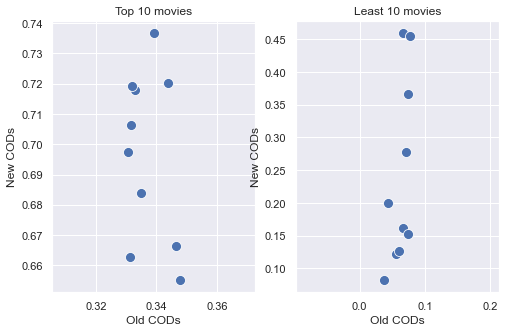

In [270]:
df_top_10['New CODs'] = top_10_CODs_new
df_least_10['New CODs'] = least_10_CODs_new

# plot old CODs and new CODs
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
sns.scatterplot(data=df_top_10, x="CODs", y="New CODs", s=100)
plt.title('Top 10 movies')
plt.axis('equal')
plt.xlabel('Old CODs')
plt.ylabel('New CODs')

plt.subplot(1,2,2)
sns.scatterplot(data=df_least_10, x="CODs", y="New CODs", s=100)
plt.title('Least 10 movies')
plt.axis('equal')
plt.xlabel('Old CODs')
plt.ylabel('New CODs')

plt.show()

# Q3 Ridge regression

In [72]:
# define functions
def rms_error(y, y_pred):
    """
    Computes mean squared error. 
    """
    rmse = np.sqrt(np.mean((y - y_pred) ** 2))
    return rmse

def regression(X, y, model, parameters):
    """
    Peforme regularization for linear regression
    """
    # define the grid search
    reg= GridSearchCV(model, parameters, scoring='neg_root_mean_squared_error', cv=5)
    
    # split data into training and test set
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    # perform hyperparameter tuning for train data
#     reg.fit(X_train, y_train)
    reg.fit(X, y)
    
    # find best hyper parameter
    best_parameter = reg.best_params_
    parameter = list(best_parameter.values())
    # find best model
    best_model = reg.best_estimator_
    
    # find best beta
    beta = best_model.coef_
    
    # make predictions
    y_pred = best_model.predict(X)
    score = rms_error(y, y_pred)
    
    return parameter, beta, score

In [209]:
# pick 30 movies in the middle of CODs
mid_30_inds = sort_inds[185: 215]
mid_30_movies = list(df_new.keys()[mid_30_inds])
# print(mid_30_movies)
# use top 10 movies as predictors

# define test size
# test_size = 0.2

# define model
model = Ridge()
# define parameters
parameters = {'alpha': np.logspace(0, 5, 100)}


# initialize variables
best_parameters = np.zeros([30, 1])
best_betas = np.zeros([30, 10])
best_scores = np.zeros([30, 1])

for i in range(30):
    movie_i = mid_30_movies[i]
    
    # define y
    y = np.array(df_new[movie_i])
    # define x
    X = df_new[top_10_movies].to_numpy()
    # standardize x
    X = ss.fit_transform(X)
    
    # perform model fitting and testing
    parameter, beta, score = regression(X, y, model, parameters)
    
    # save results
    best_parameters[i] = parameter
    best_betas[i, :] = beta
    best_scores[i] = score

In [216]:
# combine results into df
df_betas = pd.DataFrame(best_betas, columns = ['beta1','beta2','beta3', 'beta4', 'beta5', 'beta6', 'beta7', 'beta8', 'beta9', 'beta10'])

dict_ridge = {'movie name': mid_30_movies, 'best parameters': np.squeeze(best_parameters), 'RMSE': np.squeeze(best_scores)}
df_ridge = pd.DataFrame(dict_ridge)

df_ridge = pd.concat([df_ridge, df_betas], axis=1)
df_ridge.head(30)

,movie name,best parameters,RMSE,beta1,beta2,beta3,beta4,beta5,beta6,beta7,beta8,beta9,beta10
0,The Thing (1982),65.793322,0.391803,0.111842,0.148076,-0.051741,0.057132,0.033230,-0.003073,0.047173,-0.005646,-0.053265,0.063862
1,12 Monkeys (1995),475.081016,0.355516,0.025167,0.051692,0.016141,0.042710,-0.004239,0.033340,0.044302,0.016739,0.036275,0.042475
2,Armageddon (1998),533.669923,0.360093,0.045352,0.038570,0.055533,0.037503,0.009703,0.012672,0.026937,0.042939,-0.000410,0.046991
3,Bad Boys (1995),849.753436,0.335105,0.011898,0.031824,0.022523,0.036379,0.041425,0.044158,0.012386,0.024984,0.032641,0.025930
4,Bad Boys 2 (2003),756.463328,0.332130,0.020709,0.015949,0.047513,0.009390,0.034410,0.034199,0.036435,0.018827,0.041330,0.026820
5,The Mist (2007),533.669923,0.361161,0.047172,0.027780,0.056158,0.042114,0.007213,0.026712,0.032488,0.005755,0.040425,0.035942
6,Braveheart (1995),599.484250,0.363879,0.034731,0.008337,0.037567,0.035123,0.039855,0.030241,0.015396,0.028683,0.026624,0.065027
7,Baby Geniuses (1999),265.608778,0.373985,0.037214,0.079438,-0.008181,0.061268,0.035060,0.015409,0.051938,0.052571,0.005853,0.031276
8,The Others (2001),265.608778,0.337673,0.062145,0.032928,0.044822,0.013065,-0.004611,0.026710,0.044796,0.047493,-0.039777,0.072987
9,One Flew Over the Cuckoo's Nest (1975),673.415066,0.343257,0.040945,0.032627,0.020681,0.032732,0.037533,0.026819,0.023182,0.014910,0.050867,0.017290


# Q4 LASSO regression

In [222]:

# define model
model = Lasso()
# define parameters
parameters = {'alpha': np.logspace(-5, 0, 100)}


# initialize variables
best_parameters = np.zeros([30, 1])
best_betas = np.zeros([30, 10])
best_scores = np.zeros([30, 1])

for i in range(30):
    movie_i = mid_30_movies[i]
    
    # define y
    y = np.array(df_new[movie_i])
    # define x
    X = df_new[top_10_movies].to_numpy()
    # standardize x
    X = ss.fit_transform(X)
    
    # perform model fitting and testing
    parameter, beta, score = regression(X, y, model, parameters)
    
    # save results
    best_parameters[i] = parameter
    best_betas[i, :] = beta
    best_scores[i] = score

In [223]:
# combine results into df
df_betas = pd.DataFrame(best_betas, columns = ['beta1','beta2','beta3', 'beta4', 'beta5', 'beta6', 'beta7', 'beta8', 'beta9', 'beta10'])

dict_lasso = {'movie name': mid_30_movies, 'best parameters': np.squeeze(best_parameters), 'RMSE': np.squeeze(best_scores)}
df_lasso = pd.DataFrame(dict_lasso)

df_lasso = pd.concat([df_lasso, df_betas], axis=1)
df_lasso.head(30)

,movie name,best parameters,RMSE,beta1,beta2,beta3,beta4,beta5,beta6,beta7,beta8,beta9,beta10
0,The Thing (1982),0.002364,0.391408,0.123452,0.168024,-0.061932,0.047292,0.031119,-0.000000,0.045450,-0.002629,-0.060612,0.059449
1,12 Monkeys (1995),0.013530,0.354240,0.000000,0.080776,0.000000,0.050645,-0.000000,0.026889,0.058633,0.000000,0.040455,0.050818
2,Armageddon (1998),0.015199,0.358009,0.051973,0.030358,0.096018,0.033738,-0.000000,0.000000,0.000000,0.047946,-0.000000,0.062240
3,Bad Boys (1995),0.012045,0.331228,0.000000,0.043661,0.000000,0.053093,0.086120,0.086619,0.000000,0.000000,0.025116,0.006417
4,Bad Boys 2 (2003),0.021544,0.329891,0.000000,0.000000,0.091800,0.000000,0.035128,0.037157,0.034118,0.000000,0.059395,0.027799
5,The Mist (2007),0.021544,0.359548,0.063690,0.000037,0.109088,0.063235,0.000000,0.001615,0.003123,0.000000,0.039934,0.036756
6,Braveheart (1995),0.012045,0.360751,0.027239,-0.000000,0.047925,0.034022,0.054726,0.015697,0.000000,0.000000,0.018506,0.134055
7,Baby Geniuses (1999),0.010723,0.373282,0.019528,0.112659,-0.000000,0.076126,0.024899,0.000000,0.057583,0.059420,0.000000,0.011709
8,The Others (2001),0.019179,0.340146,0.070312,0.014135,0.030725,0.000000,0.000000,0.000000,0.028699,0.043453,-0.000000,0.105436
9,One Flew Over the Cuckoo's Nest (1975),0.017074,0.340721,0.061401,0.042153,0.000000,0.031574,0.053516,0.011685,0.000000,0.000000,0.100580,0.000000


# Q5 

['Scream (1996)', 'Diamonds are Forever (1971)', 'Happy Gilmore (1996)', 'Fahrenheit 9/11 (2004)']


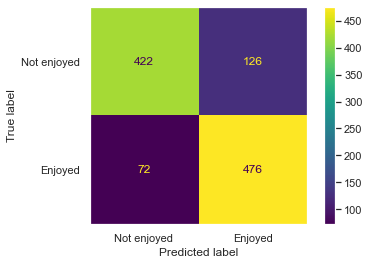

Beta:  [[0.01557516]]
AUC:  [0.91280992]


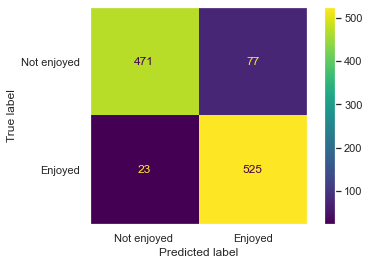

Beta:  [[0.0182477]]
AUC:  [0.98165138]


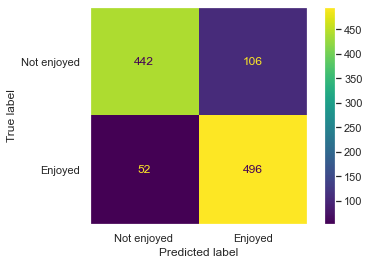

Beta:  [[0.01654193]]
AUC:  [0.93915763]


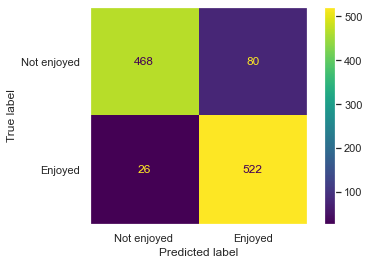

Beta:  [[0.01828947]]
AUC:  [0.96738949]


In [122]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
# get the predictor variable
X = np.array(mean_row)
# find NAN index
nan_ind = np.isnan(X)
X = X[~nan_ind]

# sort movies with mean ratings for each movie
ratings = mean_col
ratings_sort_inds = np.argsort(-ratings)
# print(ratings_sort_inds)
mid_4_inds = list(ratings_sort_inds[198:202])
# print(mid_4_inds)
mid_4_movies = list(df_new.keys()[mid_4_inds])
print(mid_4_movies)


# initialize 
betas = np.zeros([4,1])
AUCs = np.zeros([4,1])
for i in range(4):
    movie_i = mid_4_movies[i]
    ratings_i = np.array(df_new[movie_i])
    median = np.median(ratings_i)
    enjoy = (ratings_i > median)
    y = enjoy*1
    
    # delete NAN subject
    y = y[~nan_ind]
#     print(X.shape, y.shape)
    # fit the model with cv
    X = X.reshape(-1,1)
    clf = LogisticRegressionCV(cv=5, random_state=0, scoring='roc_auc').fit(X, y)
    y_pred = clf.predict(X)
    C_M = confusion_matrix(y, y_pred)
#     print(C_M)
    # plot confusion matrix
    disp=ConfusionMatrixDisplay(confusion_matrix=C_M, display_labels=['Not enjoyed', 'Enjoyed'])
    disp.plot()
    plt.grid()
    plt.show()
    
    beta = clf.coef_
    print('Beta: ', beta)
    AUC_all = clf.scores_.get(1)
    AUC_best = max(AUC_all.reshape(-1,1))
    print('AUC: ', AUC_best)

    betas[i] = beta
    AUCs[i] = AUC_best
    
    